## Loan application decisions

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
   * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
   * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.These candidates are not labelled as 'defaulted'. 
   * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).

# Data Sourcing

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import math as m

In [2]:
# load the dataset
# set column 47 (next_pymnt_d) as object or else we would get an error


col_dtype = {'next_pymnt_d':'object'}

loan_master = pd.read_csv("C:/Users/arava/Downloads/Documents/upgrad/EDA/loan/loan.csv",dtype=col_dtype)

## Data Cleaning

In [3]:
# check missing values from all  columns
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# check the % of missing values for various columns
100*loan_master.isnull().sum()/len(loan_master.index)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

From the above it is clear that there are multiple columns that have more than 90% (some even 100%) of data as missing.
Let's remove such columns.

In [5]:
# let us remove all such columns where more than 90% values are NaN
# extract the column indexes for all such columns
col_index  =100*loan_master.isnull().sum()/len(loan_master.index) > 90

In [6]:
# let us check the columns
loan_master.columns[col_index]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
# drop such columns
loan_master.drop(loan_master.columns[col_index],axis=1,inplace=True)

In [8]:
# let us check how many columns are remaining
len(loan_master.columns)

55

In [9]:
# let's check the proportion of missing values again
100*loan_master.isnull().sum()/len(loan_master.index)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


As part of data cleaning we can also remove columns which have static or zero variation values, as they are unlikely to influence our analysis with respect to loan default.

In [10]:
# from csv there are some additional columns that could be removed as they
# have almost no variation or fixed values, plus some additional values like title,emp_title and desc are
# not uniform and have many unique values,therefore they are removed.

ls_remove_cols = ['pymnt_plan','url','initial_list_status','policy_code','application_type','acc_now_delinq',
                  'delinq_amnt','title','desc','pymnt_plan','policy_code',
                  'application_type','acc_now_delinq','delinq_amnt','tax_liens',
                  'collections_12_mths_ex_med','chargeoff_within_12_mths','emp_title'        
                  ]

In [11]:
loan_master.drop(ls_remove_cols,axis=1,inplace=True)

In [12]:
# let us check the columns remaining.
len(loan_master.columns)

42

Let us check proportion of values where loan_status is 'Current'

In [13]:
# proportion of value Current in 'loan_status' column
100*len(loan_master[(loan_master.loan_status=='Current')])/len(loan_master)

2.8703074250321023

as the % of records with 'Current' status is very low we will remove these rows from our data set.

In [14]:
loan_master = loan_master[~(loan_master.loan_status=='Current')]

In [15]:
# we observe that 'term' column contains leading spaces so removing spaces  and converting into numeric
loan_master.term = loan_master.term.str.strip()

In [16]:
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [17]:
# extract the term value and convert to integer
loan_master.term = loan_master.term.apply(lambda x: int(x[0:2]))

In [18]:
# convert int_rate (interest rate) to number
loan_master.int_rate = loan_master.int_rate.apply(lambda x:x if pd.isnull(x) else x.split('%')[0])
loan_master.int_rate = loan_master.int_rate.astype('float')

In [19]:
# let's check the number of defaults and fully paid values
loan_master.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## Data Understanding and Data Analysis

In section below we would do analysis of all the variables present in the dataset one by one to find out which variables can have an impact of tendency to default for a loan applicant.

The basic strategy for analysis would be the following:
* establish baseline for average default proportion in data.
* do a univariate analysis to check distribution of variable (look if number of values are too low for certain range, in which case we cannot have conclusive evidence of influence over default).
* do a segmented univariate analysis to find if there is significant impact on proportion of default.
* do a bivariate analysis to check for correlation between variables and other interesting patterns.
* In above steps create derived metrics wherever required.
* finally analyze the findings from above steps in light of our business understanding of lending cycle to decide if the variable is actually a driver variable for default or not.



To simplify our analysis let us create a **derived metric 'loan_default'** with values as 1 and 0 to indicate if loan is default or not respectively.

In [20]:
# let's define a function to return 1/0 based on whether account is Charged Off or not
def isLoanDefault(x):
    if x == "Charged Off":
        return 1
    else:
        return 0

In [21]:
# lets create a derived metric to specify loan default
loan_master["loan_default"] = loan_master.loan_status.apply(isLoanDefault)

In [22]:
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_default
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0


In [23]:
# lets check mean for loan default, this will guide us to identify features which has more variation between 
# minimum and maximum means for different values.
default_mean =round(loan_master.loan_default.mean(),3)
print(default_mean)

0.146


In [24]:
std = round(loan_master.loan_default.std(),2)
print(std)

0.35


In [25]:
# find the value to calculate UCV and LCV based on t statistic.
delta = (sc.stats.t.ppf(1-0.025, len(loan_master.loan_default)-1))*std*(1/m.sqrt(len(loan_master.loan_default)))
print(delta)

0.0034927341984407425


In [26]:
print('UCV: ',round(default_mean+delta,4))
print('LCV: ',round(default_mean-delta,4))

UCV:  0.1495
LCV:  0.1425


The above will serve as a baseline for looking at variables that are drivers for default. This indicates that around 15% is the average default rate based on data provided.

In [27]:
#checking correlation
ls_quant = ['revol_util','dti','loan_amnt','funded_amnt','funded_amnt_inv'
            ,'int_rate','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp'
            ,'total_rec_int','revol_bal','total_acc','term','total_rec_late_fee','recoveries',
            'collection_recovery_fee']

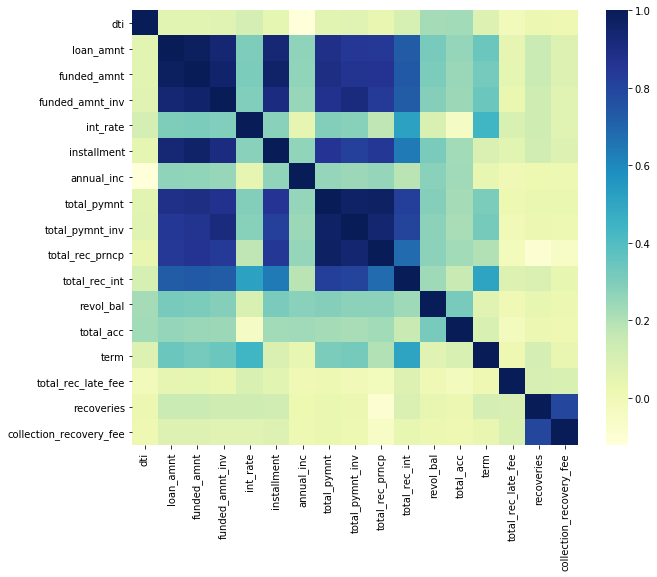

In [28]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(loan_master[ls_quant].corr(), cmap="YlGnBu")
plt.show()

We can clearly see from above that the following group of variables are highly correlated:
1. loan_amnt,funded_amnt,funded_amnt_inv,installment
2. total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
3. groups 1 and 2 above are also highly correlated, which makes sense from business understanding point of view as higher loan amount would mean higher payments and vice versa.
4. recoveries and collection_recovery_fee
5. There is also correlation between int_rate, term and total_rec_int

In [29]:
# let us collect all such Post-Loan variables
ls_remove_cols = ['out_prncp','out_prncp_inv', 'funded_amnt_inv','funded_amnt','total_rec_prncp',
                  'total_rec_int','total_pymnt','total_pymnt_inv','total_rec_late_fee','recoveries',
                  'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'
                  ,'installment']

In [30]:
# let us remove all Post-Loan variables from data set
loan_master.drop(ls_remove_cols,axis=1,inplace=True)

In [31]:
# let us check the variables which we would focus for analysis.
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
id                        38577 non-null int64
member_id                 38577 non-null int64
loan_amnt                 38577 non-null int64
term                      38577 non-null int64
int_rate                  38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
delinq_2yrs               38577 non-null int64
earliest_cr_line          385

We will define a function below to do a **Segmented Univariate Analysis** for each variable to find the proportion (percentage)
of defaults for each variable compared to total number of records for that variable.


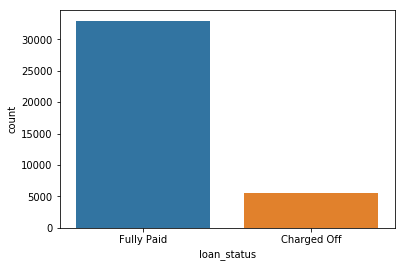

In [32]:
#showing the above analysis using plot
sns.countplot(loan_master.loan_status)

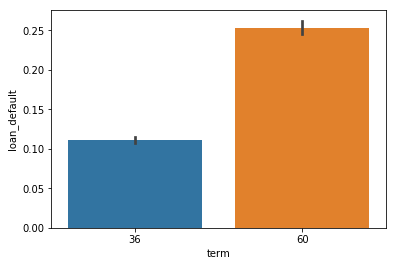

In [33]:
# lets start analysis one categorcal variable at a time and check the mean deviation from 0.15 which is for overall data
sns.barplot(x='term',y='loan_default',data=loan_master,estimator=np.mean)
plt.show()

Text(0,0.5,'default number')

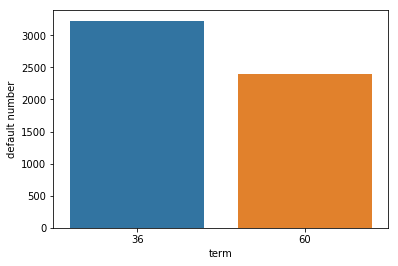

In [34]:
#the chat with count who changed off in different terms
df = loan_master[loan_master.loan_default == 1]

sns.countplot(x = 'term', data = df)
plt.ylabel('default number')

Below we will do a step by step analysis of each of the variables present in data set.

In [35]:
# let us define a new function to find the grouped proportions % of 'Charged Off' accounts
def find_grouped_proportion(x):
    gp =100*loan_master.groupby([x,'loan_status'])['id'].count()/loan_master.groupby([x])['id'].count()
    gp = gp.reset_index()
    gp.rename(columns={'id':'proportion(%)'},inplace=True)
    return gp[gp.loan_status=='Charged Off'].sort_values(by='proportion(%)',ascending=False)

### term: *variable to indicate the loan term.*

In [36]:
# let us check the distribution of default accounts based on term.
find_grouped_proportion('term')

,term,loan_status,proportion(%)
2,60,Charged Off,25.313785
0,36,Charged Off,11.090872


We do see from analysis that tendency to default increase with increase in 'term' of loan, however we cannot consider 'term' as a driver variable as from our business understanding we know that term is a **Loan Variable** which the lender can adjust based on risk profile of borrower. So a higher default rate for greater term simply suggests that LC has adjusted their term for these loans.

### Purpose: variable to indicate the purpose for which loan was applied for.

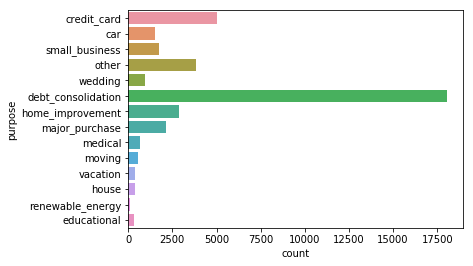

In [37]:
# let us first check the distribution of 'purpose' variable in provided data set.
sns.countplot(y=loan_master.purpose)
plt.show()

Text(0.5,0.98,'no of loan status')

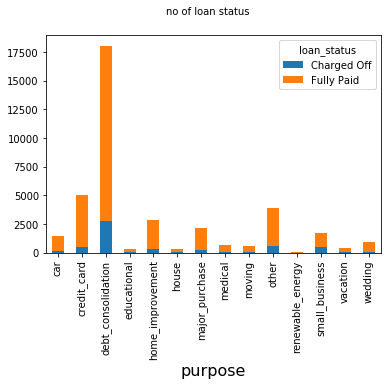

In [38]:
#this is used to understand the graph which is ploted above so we can easily understand where highest no of request are done
#and respective status of it.

pd.crosstab(loan_master.purpose, loan_master.loan_status).plot.bar(stacked = True)
plt.xlabel('purpose', fontsize=16)
plt.suptitle('no of loan status', fontsize=10)

In [39]:
# check the proportion of defaults for 'purpose'
find_grouped_proportion('purpose')

,purpose,loan_status,proportion(%)
22,small_business,Charged Off,27.080958
20,renewable_energy,Charged Off,18.627451
6,educational,Charged Off,17.230769
18,other,Charged Off,16.377749
10,house,Charged Off,16.076294
16,moving,Charged Off,15.972222
14,medical,Charged Off,15.565345
4,debt_consolidation,Charged Off,15.325395
24,vacation,Charged Off,14.133333
8,home_improvement,Charged Off,12.069565


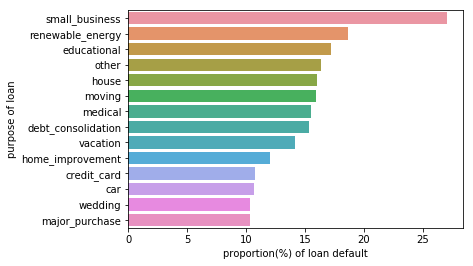

In [40]:
f = find_grouped_proportion('purpose')
sns.barplot(y='purpose',x='proportion(%)',data=f,estimator=np.mean)
plt.xlabel('proportion(%) of loan default')
plt.ylabel('purpose of loan')
plt.show()

### *emp_length*: variable to indicate the number of years of employment of loan applicant.

In [41]:
find_grouped_proportion('emp_length')

,emp_length,loan_status,proportion(%)
2,10+ years,Charged Off,15.680961
14,7 years,Charged Off,15.371128
0,1 year,Charged Off,14.389397
10,5 years,Charged Off,14.339386
20,< 1 year,Charged Off,14.174800
12,6 years,Charged Off,14.160517
16,8 years,Charged Off,14.146341
6,3 years,Charged Off,13.833500
8,4 years,Charged Off,13.824057
4,2 years,Charged Off,13.213703


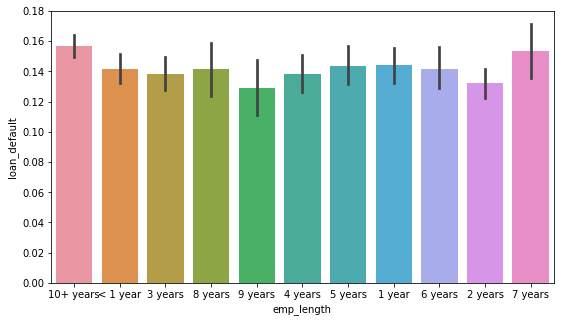

In [42]:
loan_master.emp_length[0:10]
plt.figure(figsize=(9,5))
sns.barplot(x='emp_length',y='loan_default',data=loan_master)
plt.show()

We can see from above that there is no particular pattern between employee length and proportion of default.

### addr_state: * variable indicating the state of loan applicant.*

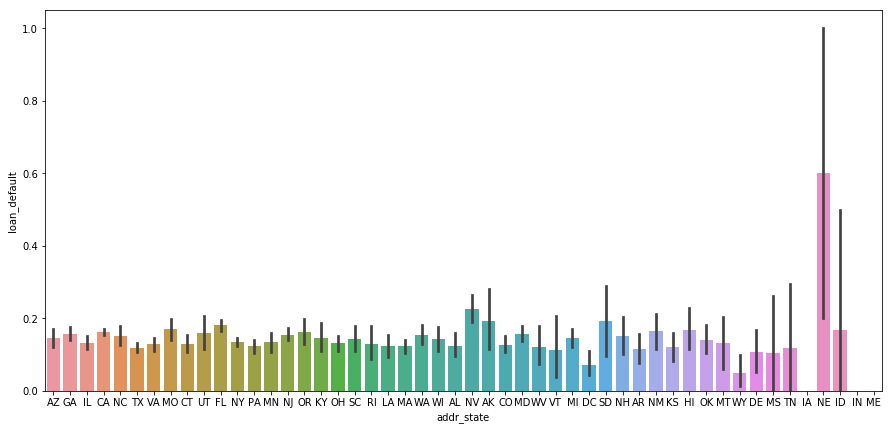

In [43]:
# let us check now for add_state. distribution of default with respect to his state of residence
plt.figure(figsize=(15,7))
sns.barplot(x='addr_state',y='loan_default',data=loan_master)
plt.show()

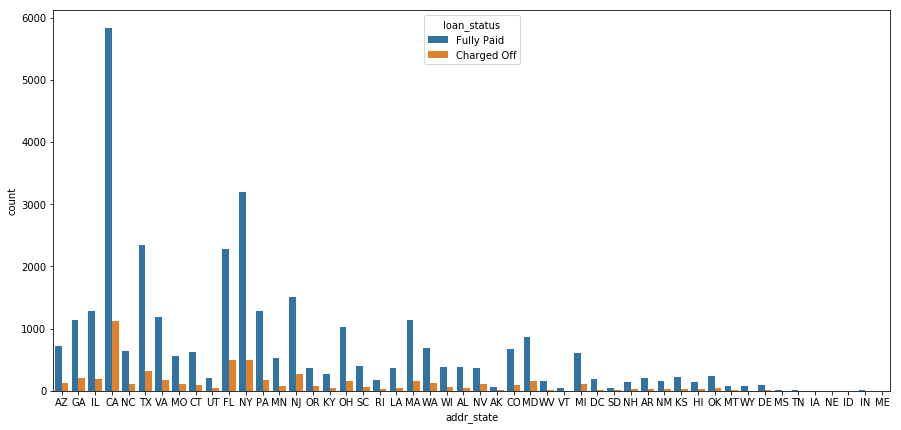

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='addr_state',data=loan_master, hue=loan_master.loan_status)
plt.show()

In [45]:
print('Number of NE values',len(loan_master[loan_master.addr_state=='NE']))
print('% of values with state NE',round(100*len(loan_master[loan_master.addr_state=='NE'])/len(loan_master),2))

Number of NE values 5
% of values with state NE 0.01


We can see from above that as state 'NE' has very few records (0.01%) as compared to other states we cannot meaningfully conclude that there is any bearing of state on default.

Text(0,0.5,'default number')

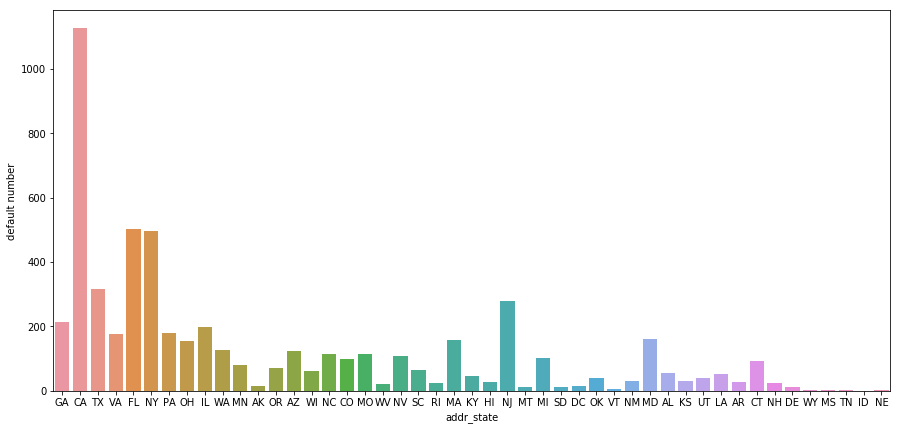

In [46]:
#the chat with count who changed off in different states 
df = loan_master[loan_master.loan_default == 1]
plt.figure(figsize=(15,7))
sns.countplot(x = 'addr_state', data = df)
plt.ylabel('default number')

### inq_last_6mths: * variable indicating the number of inquiries in past 6 months (excluding auto and mortgage inquiries)*

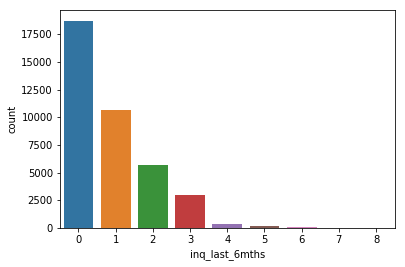

In [47]:
# let us check the distribution of variable - inq_last_6mths
sns.countplot(loan_master.inq_last_6mths)
plt.show()

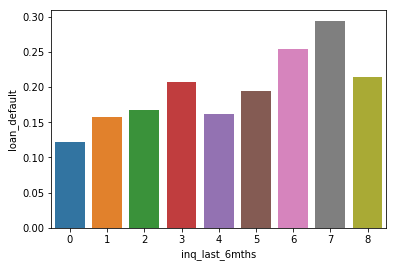

In [48]:
sns.barplot(x='inq_last_6mths',y='loan_default',data=loan_master,ci=None)
plt.show()

### pub_rec_bankruptcies: * variable indicating Number of public record bankruptcies in its past history.*
### pub_rec:* variable indicating number of derogatory public records.*

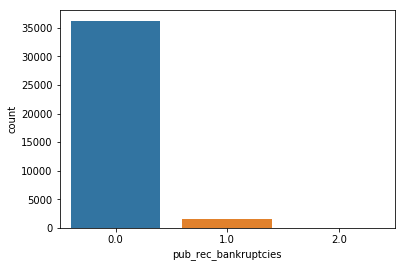

In [49]:
# check the distribution of pub_rec_bankruptcies variable
sns.countplot(loan_master.pub_rec_bankruptcies)
plt.show()

The loan borowers who have public record bancrupties in their past records should not be granted with loan as its highly risky.

In [50]:
# let us check how many missing values are there
loan_master.pub_rec_bankruptcies.isnull().sum()

697

In [51]:
# as the proportion of values is very small compared to total data set let's input by 0, its meaning is no record
loan_master.loc[loan_master.pub_rec_bankruptcies.isnull(),'pub_rec_bankruptcies'] = 0

In [52]:
# let us find the proportion of default for pub_rec
find_grouped_proportion('pub_rec')

,pub_rec,loan_status,proportion(%)
2,1,Charged Off,22.702434
4,2,Charged Off,20.833333
0,0,Charged Off,14.134276


In [53]:
loan_master[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.841571
pub_rec_bankruptcies,0.841571,1.000000


In [54]:
find_grouped_proportion('verification_status')

,verification_status,loan_status,proportion(%)
4,Verified,Charged Off,16.803212
2,Source Verified,Charged Off,14.818642
0,Not Verified,Charged Off,12.830957


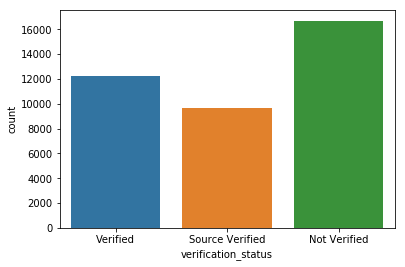

In [55]:
# check the distribution of verification status.
sns.countplot(loan_master.verification_status)
plt.show()

Text(0,0.5,'default')

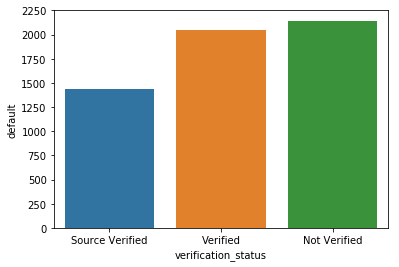

In [56]:

sns.countplot(x = 'verification_status', data = df)
plt.ylabel('default')

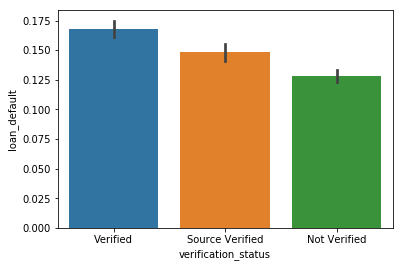

In [57]:
# check the loan default based on verification status
sns.barplot(x='verification_status',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

from above two graph verified are customers are less and more in defaults so that means the verification is done wrong or no 
significance

### in which month more loans are given by bankers

In [58]:
df1 = loan_master.issue_d.str.strip('-')


In [59]:
df1 = df1.apply(lambda x: str(x[0:3]))


In [60]:
df1.head()

0    Dec
1    Dec
2    Dec
3    Dec
5    Dec
Name: issue_d, dtype: object

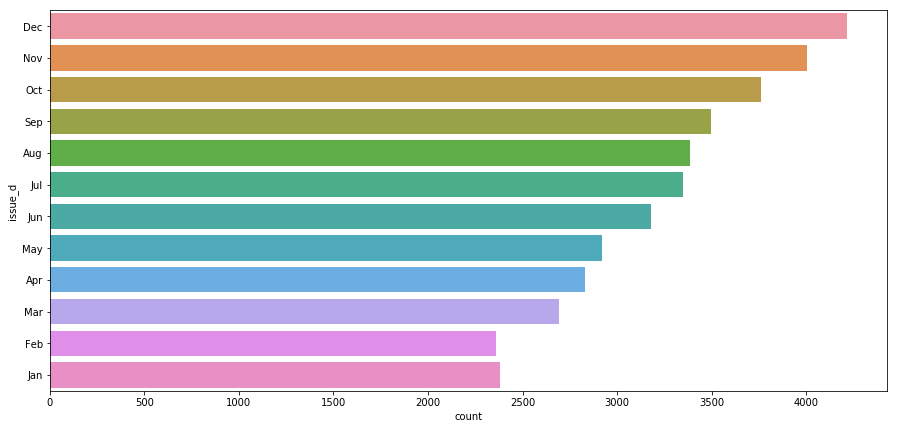

In [61]:
plt.figure(figsize=(15,7))
sns.countplot(y=df1)
plt.show()

### zip_code: * The first 3 numbers of the zip code provided by the borrower in the loan application.*

In [62]:
# define function to create bins.
def createbin(x, binsize):
    return round((x / binsize),0) * binsize

In [63]:
# extract the first 3 characters from zip code and create bins based on the same
loan_master.zip_code = loan_master.zip_code.apply(lambda x:x.replace("xx",""))
loan_master.zip_code = loan_master.zip_code.astype(int)
loan_master.zip_code = loan_master.zip_code.apply(lambda x: createbin(x,100))

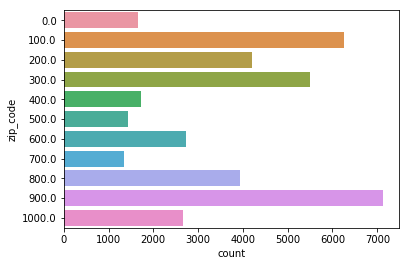

In [64]:
sns.countplot(y=loan_master.zip_code)
plt.show()

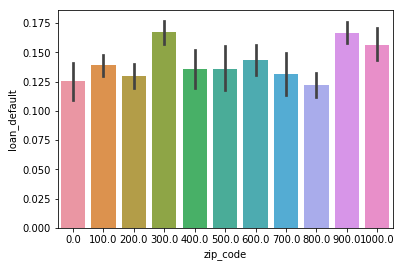

In [65]:
sns.barplot(x='zip_code',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

we observe that zip_code also does not show any particular pattern for default.

### *int_rate, grade,sub_grade* :

Based on information provided in the Lending Club website, grades and sub-grades for a loan are decided based on 
interest rate (as shown below) so sub-grades serve as a natural bin for interest rates which we will analyze.

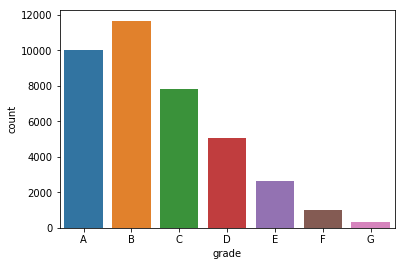

In [66]:
# let us check the distribution of grades
sns.countplot(x=loan_master.grade.sort_values())
plt.show()

Text(0,0.5,'default number')

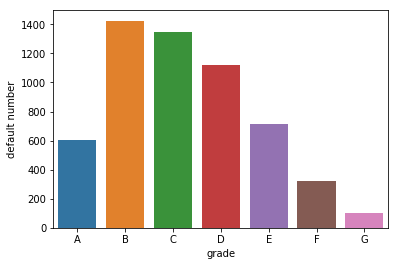

In [67]:
#the chat with count who changed off in different grades
df = loan_master[loan_master.loan_default == 1]
sns.countplot(x = df.grade.sort_values())
plt.ylabel('default number')

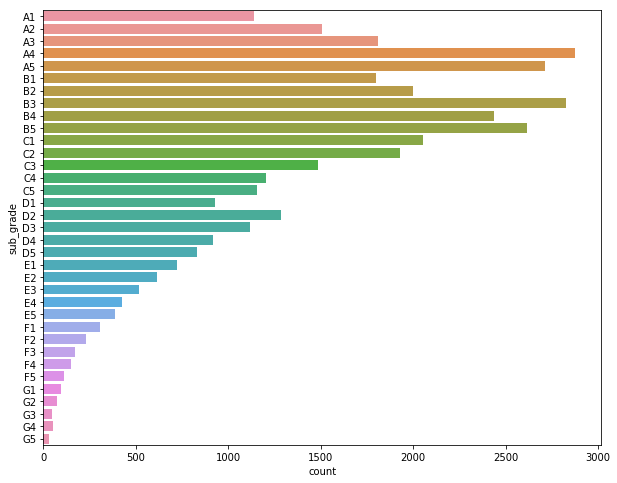

In [68]:
# let us first check the distribution of sub-grades
plt.figure(figsize=(10,8))
sns.countplot(y=loan_master.sub_grade.sort_values())
plt.show()

In [69]:
find_grouped_proportion('sub_grade')

,sub_grade,loan_status,proportion(%)
58,F5,Charged Off,47.787611
64,G3,Charged Off,42.222222
62,G2,Charged Off,36.363636
56,F4,Charged Off,35.099338
68,G5,Charged Off,34.482759
60,G1,Charged Off,32.978723
52,F2,Charged Off,30.042918
50,F1,Charged Off,29.836066
46,E4,Charged Off,29.716981
54,F3,Charged Off,29.310345


 default percentage  is  increasing with increase of sub-grade which is porportional to the increase in interest rate, **sub-grade(interest rate)** ,
 

### delinq_2yrs:* variable to indicate the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years*

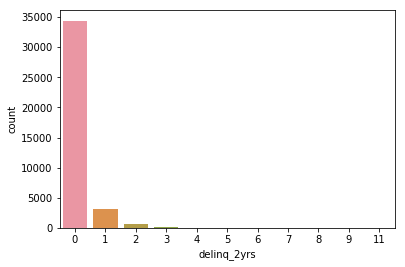

In [70]:
#let's first check the distribution of this varaible
sns.countplot(loan_master.delinq_2yrs)
plt.show()

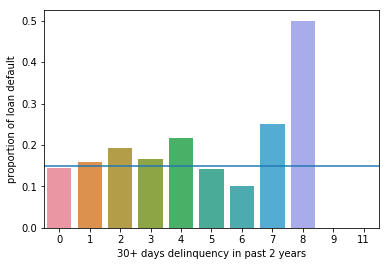

In [71]:
sns.barplot(x='delinq_2yrs',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.xlabel('30+ days delinquency in past 2 years')
plt.ylabel('proportion of loan default')
plt.axhline(y=0.15)
plt.show()

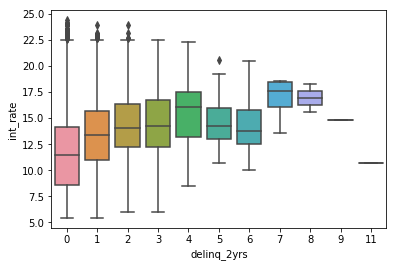

In [72]:
# let's do a bivariate analysis with int_rate and delinq_2yrs
sns.boxplot(x='delinq_2yrs',y='int_rate',data=loan_master)
plt.show()

In [73]:
# let's check the proportion of default for delinq_2yrs
find_grouped_proportion('delinq_2yrs')

,delinq_2yrs,loan_status,proportion(%)
16,8,Charged Off,50.000000
14,7,Charged Off,25.000000
8,4,Charged Off,21.666667
4,2,Charged Off,19.316493
6,3,Charged Off,16.509434
2,1,Charged Off,15.809167
0,0,Charged Off,14.354679
10,5,Charged Off,14.285714
12,6,Charged Off,10.000000


Text(0,0.5,'Loan')

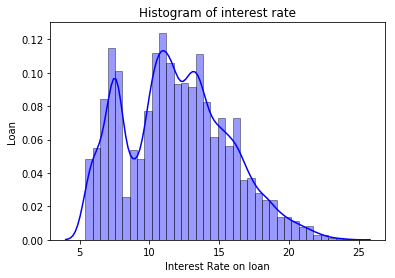

In [74]:
# seaborn histogram
sns.distplot(loan_master['int_rate'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of interest rate')
plt.xlabel('Interest Rate on loan')
plt.ylabel('Loan')

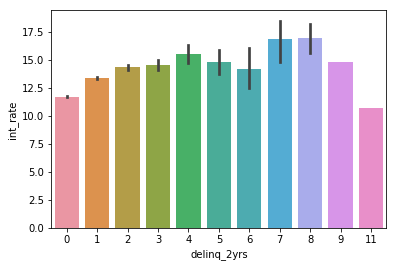

In [75]:
# let's do a bivariate analysis with int_rate and delinq_2yrs
sns.barplot(x='delinq_2yrs',y='int_rate',data=loan_master)
plt.show()

we see that there is a correlation between increase in past due to
deliquencies and increase in incidences of default.

In [76]:
# let's check the proportion of default for delinq_2yrs
find_grouped_proportion('delinq_2yrs')

,delinq_2yrs,loan_status,proportion(%)
16,8,Charged Off,50.000000
14,7,Charged Off,25.000000
8,4,Charged Off,21.666667
4,2,Charged Off,19.316493
6,3,Charged Off,16.509434
2,1,Charged Off,15.809167
0,0,Charged Off,14.354679
10,5,Charged Off,14.285714
12,6,Charged Off,10.000000


int_rate increase as delinq_2yrs that means there is a posiblity of default with in  increase of delinq_2yrs

### home_ownership: * variable to indicate home ownership status. *

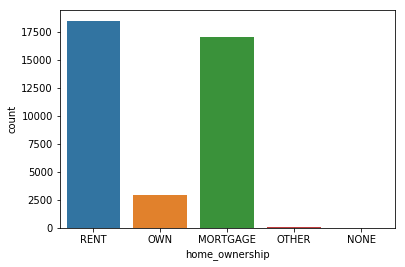

In [77]:
# let's check the distribution of home ownership.
sns.countplot(loan_master.home_ownership)
plt.show()

We note from above that the distribution conatains very few samples of ownership 'OTHER', let's check the count proportion below

In [78]:
len(loan_master[loan_master.home_ownership=='OTHER'])
      

98

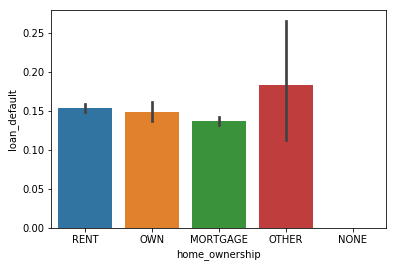

In [79]:
# let's check the distribution of default across home ownership.
sns.barplot(x='home_ownership',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

In [80]:
# find the proportion of default.
find_grouped_proportion('home_ownership')

,home_ownership,loan_status,proportion(%)
3,OTHER,Charged Off,18.367347
7,RENT,Charged Off,15.362554
5,OWN,Charged Off,14.890756
0,MORTGAGE,Charged Off,13.671347


In [81]:
loan_master[loan_master.home_ownership=='OTHER'].loan_default.mean()

0.1836734693877551

In [82]:
loan_master[loan_master.home_ownership=='OTHER'].loan_default.std()

0.38920852215985663

As the count of home ownership for 'Other' is very small and has a large standard deviation we cannot conclude that it has any signifcant impact on tendency to default. Based on given data we cannot conclude that home ownership status has any impact on default.

### annual_inc: * variable indicating the annual income of loan applicant.*

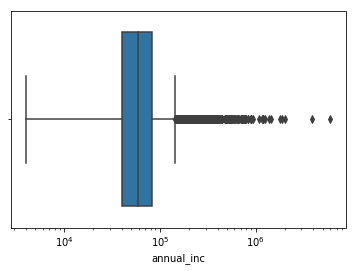

In [83]:
# let us first check how annual income is distributed.
sns.boxplot(loan_master.annual_inc)
plt.xscale('log')
plt.show()

from above boxplot we see that while most of the annual income distribution is within 200k range, there are large number of very large outlier annual income values.

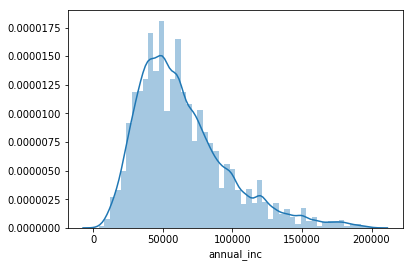

In [84]:
sns.distplot(loan_master[loan_master.annual_inc <200000].annual_inc)
plt.show()

In [85]:
# create a function to divide annual income into buckets
def Find_SalaryRange(x):
    if x >=0 and x <2000:
        return '0-2k'
    if x>=2000 and x < 5000:
        return '2-5k'
    elif x>=5000 and x < 8000:
        return '5-8k'
    elif x>=8000 and x < 10000:
        return '8-10k'
    elif x>=10000 and x < 13000:
        return '10-13k'
    elif x>=13000 and x < 16000:
        return '13-16k'
    elif x>=16000 and x < 20000:
        return '16-20k'
    elif x>=20000 and x < 30000:
        return '20-30k'
    elif x>=30000 and x < 50000:
        return '30-50k'
    elif x>=50000 and x < 100000:
        return '50-100k'
    else:
        return 'above 100K'

In [86]:
loan_master['annual_inc_range'] = loan_master.annual_inc.apply(Find_SalaryRange)

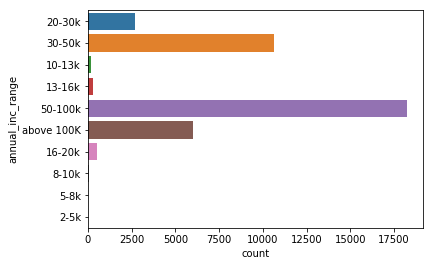

In [87]:
sns.countplot(y=loan_master.annual_inc_range)
plt.show()

In [88]:
find_grouped_proportion('annual_inc_range')

,annual_inc_range,loan_status,proportion(%)
0,10-13k,Charged Off,28.804348
6,2-5k,Charged Off,22.222222
2,13-16k,Charged Off,20.875421
4,16-20k,Charged Off,19.678715
16,8-10k,Charged Off,18.181818
8,20-30k,Charged Off,17.616387
10,30-50k,Charged Off,16.473580
14,50-100k,Charged Off,13.894067
12,5-8k,Charged Off,13.333333
18,above 100K,Charged Off,10.771032


from above it can be observed that generally default is more at lower annual income levels.

Text(0,0.5,'Loan')

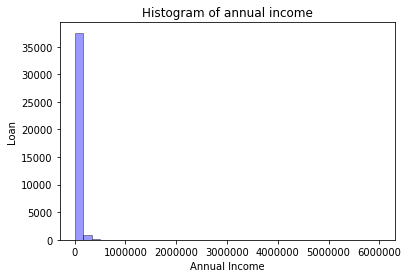

In [89]:
# seaborn histogram
sns.distplot(loan_master['annual_inc'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of annual income')
plt.xlabel('Annual Income')
plt.ylabel('Loan')

In [90]:
# let us check if there is any correlation between loan amount and annual income
loan_master[['loan_amnt','annual_inc']].corr()

,loan_amnt,annual_inc
loan_amnt,1.000000,0.268999
annual_inc,0.268999,1.000000


There does not seem to be much correlation between loan amount and annual income which means that typically loan amounts are in the same range for person with a low income as well as person with a higher income.

### dti : * variable indicating debt to income ratio of loan applicant*


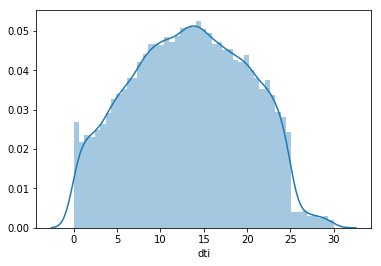

In [91]:
# let us check how dti values are distributed
sns.distplot(loan_master.dti)
plt.show()

In [92]:
# create a function to divide dti into buckets
def Find_DTI_Range(x):
    if x >=0 and x <2.5:
        return '0-2.5'
    if x>=2.5 and x < 5:
        return '2.5-5'
    elif x>=5 and x < 7.5:
        return '5-7.5'
    elif x>=7.5 and x < 10:
        return '7.5-10'
    elif x>=10 and x < 12.5:
        return '10-12.5'
    elif x>=12.5 and x < 15:
        return '12.5-15'
    elif x>=15 and x < 17.5:
        return '15-17.5'
    elif x>=17.5 and x < 20:
        return '17.5-20'
    elif x>=20 and x < 22.5:
        return '20-22.5'
    elif x>=22.5 and x < 25:
        return '22.5-25'
    else:
        return 'above 25'

In [93]:
loan_master['dti_range'] = loan_master.dti.apply(Find_DTI_Range)

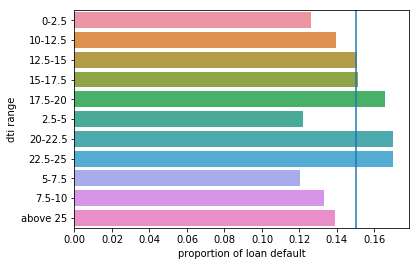

In [94]:

sns.barplot(y=loan_master.dti_range.sort_values(),x=loan_master.loan_default,data=loan_master,estimator=np.mean,ci=None)
plt.axvline(x=0.15)
plt.xlabel('proportion of loan default')
plt.ylabel('dti range')
plt.show()

In [95]:
find_grouped_proportion('dti_range')

,dti_range,loan_status,proportion(%)
14,22.5-25,Charged Off,17.006803
12,20-22.5,Charged Off,16.971850
8,17.5-20,Charged Off,16.544725
6,15-17.5,Charged Off,15.107914
4,12.5-15,Charged Off,15.094340
2,10-12.5,Charged Off,13.937958
20,above 25,Charged Off,13.920000
18,7.5-10,Charged Off,13.307105
0,0-2.5,Charged Off,12.641674
10,2.5-5,Charged Off,12.181818


From above we can say that the default increase as Debt to Income ratio increases beyond 17.5 and Above 25 it decreases but there are also few instances where dti is more than 25.

### revol_util: * variable indicating revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.*

In [96]:
loan_master.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [97]:
# let us first convert to value by removing % sign
loan_master.revol_util = loan_master.revol_util.apply(lambda x: x if pd.isnull(x) else float(x.split('%')[0]))

In [98]:
loan_master.revol_util.max()

99.9

In [99]:
# create a function to divide revolving utilization into buckets
def Find_revo_util_range(x):
    if x >=0 and x <10:
        return '0-10'
    if x>=10 and x < 20:
        return '10-20'
    elif x>=20 and x < 30:
        return '20-30'
    elif x>=30 and x < 40:
        return '30-40'
    elif x>=40 and x < 50:
        return '40-50'
    elif x>=50 and x < 60:
        return '50-60'
    elif x>=60 and x < 70:
        return '60-70'
    elif x>=70 and x < 80:
        return '70-80'
    elif x>=80 and x < 90:
        return '80-90'
    elif x>=90 and x < 100:
        return '90-100'
    else:
        return 'above 100'

In [100]:
loan_master['revol_util_range'] = loan_master.revol_util.apply(Find_revo_util_range)

In [101]:
find_grouped_proportion('revol_util_range')

,revol_util_range,loan_status,proportion(%)
20,above 100,Charged Off,32.000000
18,90-100,Charged Off,21.407907
16,80-90,Charged Off,18.868981
14,70-80,Charged Off,17.815945
12,60-70,Charged Off,16.151788
10,50-60,Charged Off,15.070456
8,40-50,Charged Off,14.258600
6,30-40,Charged Off,12.425000
4,20-30,Charged Off,11.197847
2,10-20,Charged Off,10.078455


Text(0,0.5,'Loan')

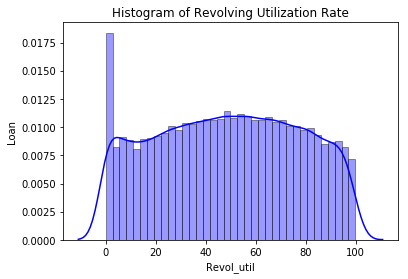

In [102]:
df=loan_master[~np.isnan(loan_master['revol_util'])]
# seaborn histogram
sns.distplot(df['revol_util'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Revolving Utilization Rate')
plt.xlabel('Revol_util')
plt.ylabel('Loan')

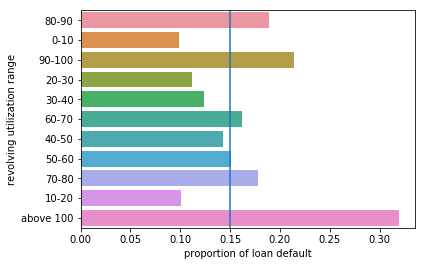

In [103]:
sns.barplot(y=loan_master.revol_util_range,x=loan_master.loan_default,data=loan_master,estimator=np.mean,ci=None)
plt.axvline(x= 0.15)
plt.ylabel('revolving utilization range')
plt.xlabel('proportion of loan default')
plt.show()

From above it is clear that tendency to default increases as revolving line utilization rate increase beyond 60%
revol_util_range is a driver variable for tendency to default.